# Aim
Evaluate the difference between performance of the following:
1. Postal Codes 
2. Clustered (KMeans)
3. Clustered (TS Analysis)
***
#### Important Note: 
- First computed with three-room house type
- Number of clusters (KMeans) : Optimal according to SSE/SI/DB
- Error Metrics : (RMSE, MAE)
- Generalisation error calculated over the entire training set.
***

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from sklearn.metrics import pairwise_distances, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
import re

In [2]:
# read csv file
df = pd.read_csv("../Ken Folder/df_geo_imp.csv", index_col=0)
# rename column names
df.columns = ["PC", "BT", "Quarter", "EUR/m2", "latitude", "longitude"]
df

,PC,BT,Quarter,EUR/m2,latitude,longitude
0,100,one-room,2010-01-01,5458,60.1714,24.9316
1,100,two-room,2010-01-01,5164,60.1714,24.9316
2,100,three or more room,2010-01-01,4944,60.1714,24.9316
3,100,terrace house,2010-01-01,1783,60.1714,24.9316
4,100,one-room,2010-04-01,5347,60.1714,24.9316
...,...,...,...,...,...,...
308931,99980,terrace house,2021-01-01,2219,69.8467,26.8907
308932,99980,one-room,2021-04-01,2290,69.8467,26.8907
308933,99980,two-room,2021-04-01,2290,69.8467,26.8907
308934,99980,three or more room,2021-04-01,2290,69.8467,26.8907


In [3]:
# create dataframes of different room types
one_room = df[df["BT"] == "one-room"]
two_room = df[ df["BT"] == "two-room"]
three_room = df[ df["BT"] == "three or more room"]

In [9]:
# Use 3-room apartments, create time series
ts_df = pd.DataFrame()
grouping = three_room.groupby('PC')
for i in df.PC.unique():
    ts_df[str(i)] = grouping.get_group(i)["EUR/m2"].values
ts_df = ts_df
ts_df

# Preprocessing time series
ts_df = ts_df.T
scaler = MinMaxScaler(copy=False)
ts_df = pd.DataFrame(data=scaler.fit_transform(ts_df),
                     index=ts_df.index)
ts_df


,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
100,0.766240,0.824073,0.731399,0.895119,0.814661,0.777979,0.817636,0.713351,0.794113,0.874353,...,0.796520,0.790337,0.909848,0.748476,0.800962,0.701984,0.825183,0.813159,0.786600,0.831317
120,0.989461,0.877287,0.909566,0.944475,0.833785,0.757108,0.827971,0.762323,0.817006,0.933964,...,0.905373,0.865649,0.892920,0.887029,0.849308,0.859603,0.958896,0.899906,0.838916,0.854536
130,0.800968,0.808629,0.817783,0.895663,0.802709,0.764670,0.851309,0.811453,0.797086,0.911833,...,0.686905,0.700391,0.729276,0.655111,0.683584,0.660242,0.720317,0.697026,0.627068,0.667063
140,1.000000,1.000000,1.000000,1.000000,1.000000,0.923775,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.924474,1.000000,1.000000,1.000000,0.951303,1.000000
150,0.943849,0.907672,0.867218,0.974778,0.926853,0.808530,0.946158,0.794864,0.840048,0.899697,...,0.972818,0.987637,0.949483,0.857980,1.000000,0.936245,0.886963,0.926715,1.000000,0.958855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99830,0.220111,0.224442,0.226759,0.246961,0.224701,0.201603,0.224871,0.211198,0.228631,0.243263,...,0.186968,0.193768,0.200726,0.191512,0.191221,0.185789,0.205522,0.200539,0.183416,0.195896
99870,0.220111,0.224442,0.226759,0.246961,0.224701,0.201603,0.224871,0.211198,0.228631,0.243263,...,0.186968,0.193768,0.200726,0.191512,0.191221,0.185789,0.205522,0.200539,0.183416,0.195896
99930,0.220111,0.224442,0.226759,0.246961,0.224701,0.201603,0.224871,0.211198,0.228631,0.243263,...,0.186968,0.193768,0.200726,0.191512,0.191221,0.185789,0.205522,0.200539,0.183416,0.195896
99950,0.220111,0.224442,0.226759,0.246961,0.224701,0.201603,0.224871,0.211198,0.228631,0.243263,...,0.186968,0.193768,0.200726,0.191512,0.191221,0.185789,0.205522,0.200539,0.183416,0.195896


In [6]:
# Clustering 
# 74m
K = range(2,20)
sse_scores = []
si_scores = []
db_scores = []

for k in K :
    print('K:', k)
    km = KMeans(
        n_clusters=k,
        random_state=42
    )
    labels = km.fit_predict(ts_df)

    sse_score = km.inertia_
    si_score = silhouette_score(ts_df, labels)
    db_score = davies_bouldin_score(ts_df, labels)

    print('sse score :' , sse_score)
    print('si score :' , si_score)
    print('db score :' , db_score)
    
    sse_scores.append(sse_score)
    si_scores.append(si_score)
    db_scores.append(db_score)


K: 2
sse score : 693.9051722208054
si score : 0.822265875864441
db score : 0.8662831137238197
K: 3
sse score : 605.363579340521
si score : 0.7990827698597679
db score : 1.6583288621225307
K: 4
sse score : 557.5024587350259
si score : 0.7527501462712878
db score : 1.667457866080195
K: 5
sse score : 524.755042292455
si score : 0.7319421066415338
db score : 1.7303180573425194
K: 6
sse score : 497.796500019977
si score : 0.71057530700709
db score : 1.840782606586317
K: 7
sse score : 473.80367464451143
si score : 0.7233382768142175
db score : 1.8674386431144971
K: 8
sse score : 456.21856507897945
si score : 0.7232223479630444
db score : 1.8269211251159492
K: 9
sse score : 440.79455966621936
si score : 0.7169385980669174
db score : 1.8678136172185857


([<matplotlib.axis.XTick at 0x7fb76a60f250>,
 <a list of 8 Text xticklabel objects>)

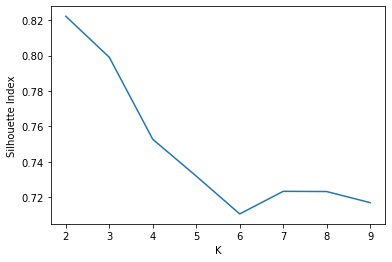

In [13]:
plt.figure(figsize= (6,4))
plt.plot(list(K), si_scores)
plt.xlabel("K")
plt.ylabel("Silhouette Index")
plt.xticks(list(K))

([<matplotlib.axis.XTick at 0x7fb7784781f0>,
 <a list of 8 Text xticklabel objects>)

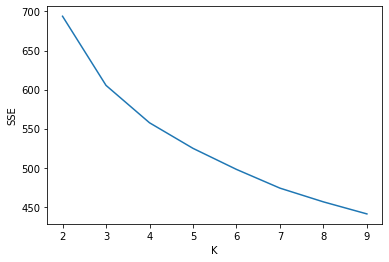

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(list(K), sse_scores)
plt.xlabel("K")
plt.ylabel("SSE")
plt.xticks(list(K))


([<matplotlib.axis.XTick at 0x7fb7784b0340>,
 <a list of 8 Text xticklabel objects>)

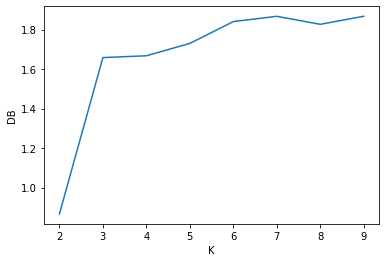

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(list(K), db_scores)
plt.xlabel("K")
plt.ylabel("DB")
plt.xticks(list(K))
